## Medical Cost/insurance prediction

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style='darkgrid', palette='deep')

In [50]:
url="https://drive.google.com/file/d/1SVZE4GoH1AeRmESzOjKa5dX1kdHg1bSN/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [51]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
df.shape

(1338, 7)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [54]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


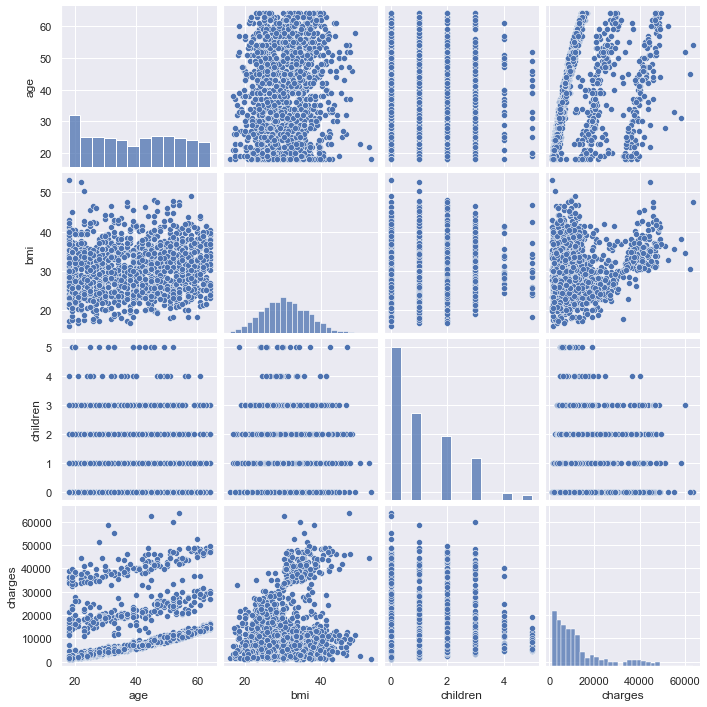

In [55]:
sns.pairplot(df)

In [56]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [57]:
df.mean()

C:\Users\SAURAB~1\AppData\Local\Temp/ipykernel_17688/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [58]:
df.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
47   male    29.830  3         no      northwest  9620.33070     1
48   female  25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Length: 1337, dtype: int64

In [59]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [60]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [61]:
df.duplicated().value_counts()

False    1337
True        1
dtype: int64

In [62]:
df['age']=df['age'].astype(float)
df['children']=df['children'].astype(float)

In [63]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [64]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [65]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [66]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [67]:
for i in df.columns:
    df[i].replace({'..':np.nan},inplace=True) #7. single special characters replacing with null values
    df

In [68]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [69]:
def mea(df,col):#to replace null values with median
    
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    upper=q3+(1.5*IQR)
    lower=q1-(1.5*IQR)
    median=df[col].median()
    df[col]=np.where(df[col]>upper,median,np.where(df[col]<lower,median,df[col]))
    sns.boxplot(df[col],data=df)

In [70]:
pd.set_option('display.max_rows', 100)
df.head(30)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
5,31.0,female,25.740,0.0,no,southeast,3756.62160
6,46.0,female,33.440,1.0,no,southeast,8240.58960
7,37.0,female,27.740,3.0,no,northwest,7281.50560
8,37.0,male,29.830,2.0,no,northeast,6406.41070
9,60.0,female,25.840,0.0,no,northwest,28923.13692


In [71]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19.0,male,30.59,0.0,no,northwest,1639.5631


In [72]:
df.drop_duplicates(keep='first', inplace = True)

<AxesSubplot:>

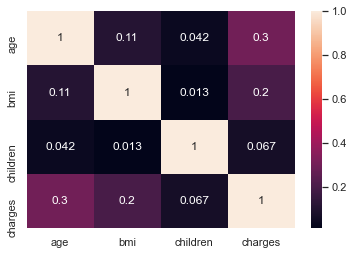

In [73]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

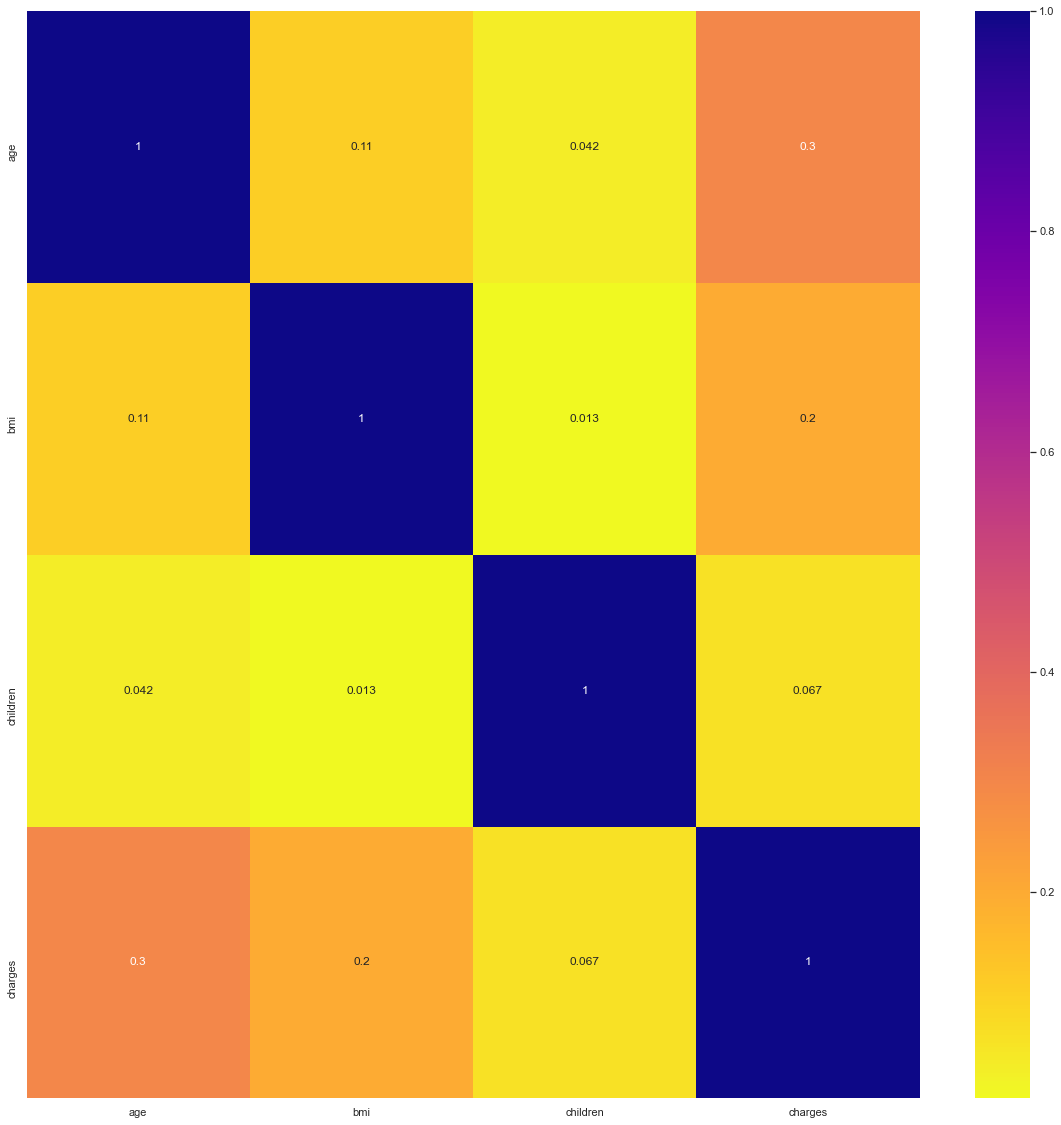

In [74]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap="plasma_r", annot=True)

d:\programs\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

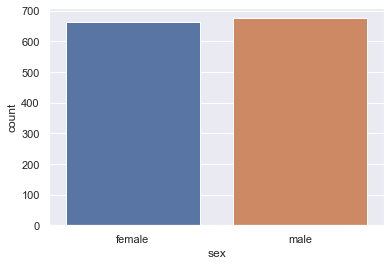

In [75]:
sns.countplot(df['sex'])

d:\programs\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

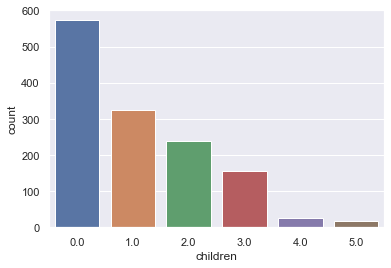

In [76]:
sns.countplot(df['children'])

d:\programs\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

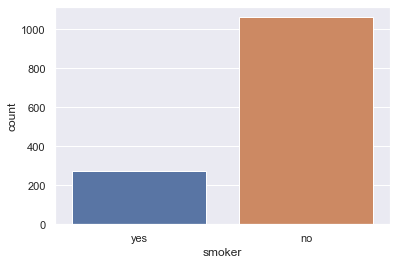

In [77]:
sns.countplot(df['smoker'])

d:\programs\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

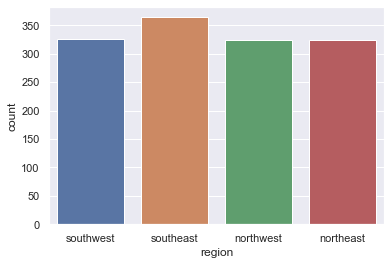

In [78]:
sns.countplot(df['region'])

In [79]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']= le.fit_transform(df['sex'])
df['age']= le.fit_transform(df['age'])
df['bmi']= le.fit_transform(df['bmi'])
df['charges']= le.fit_transform(df['charges'])
df['children']= le.fit_transform(df['children'])
df['region']= le.fit_transform(df['region'])
df['smoker']= le.fit_transform(df['smoker'])

In [80]:
df.shape

(1337, 7)

In [81]:
df.head(10) # 0=female smoker=1
#sw=3,se=2,nw=1,ne=0

,age,sex,bmi,children,smoker,region,charges
0,1,0,197,0,1,3,1005
1,0,1,350,1,0,2,57
2,10,1,331,3,0,2,306
3,15,1,73,0,0,1,1097
4,14,1,223,0,0,1,254
5,13,0,144,0,0,2,247
6,28,0,342,1,0,2,586
7,19,0,193,3,0,1,526
8,19,1,250,2,0,0,459
9,42,0,147,0,0,1,1169


In [82]:
x=df.drop(['charges'], axis=1)
y=df['charges']

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [84]:
x_test

,age,sex,bmi,children,smoker,region
900,31,1,70,0,0,0
1064,11,0,141,4,0,3
1256,33,0,412,3,0,1
298,13,1,364,3,1,1
237,13,1,454,2,0,2
...,...,...,...,...,...,...
534,46,1,491,0,0,2
542,45,0,411,0,0,2
760,4,0,369,2,0,0
1284,43,1,411,1,1,3


In [85]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 1)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [86]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([ 653.2,  349.7,  748.6, 1265.3,  454.6,  702.7, 1242.1,  103.2,
        591.1,  728.9,  943.8, 1109.9, 1265.7,  914.1,  495.3,  602.4,
        529.9, 1257.9,  333.2,  252. ,  289.9, 1076.2,  757.5, 1075.5,
       1244.3,  936.3, 1287.3, 1303.1,  714.7,  752.8,  278.1,  642.6,
         56.4,  886.3, 1320. ,  686.6,  445.3,  426.3, 1101.2,  615.3,
        207.8, 1083.2, 1270.1,  666. ,  618.7,  203.6,  197.7,  634.9,
        359.2,  740.1,  346.1,  473.8, 1116.3,  136.6,  561.4,  575.4,
        712.6,  210.3, 1271.5,  539.3,  767.4,  440.7,  935.1,   57.3,
        805.1,  894.1,  422.7, 1107.5,  997.4,  970.1,  812. ,  989.2,
        619.2,  289.1,  850.9,   78.6,  915.3,  425.9,  834.3,  887.9,
        595.4,  911.4,  900.1,  658.8, 1167. ,  894.4,  231.5,   56.4,
        586.7,  190.3,  983.9, 1008.5,  309.3,  338.5,   72.5, 1284.5,
        782.2,  642.7,   49. ,  626.2,  943.2,  866.4, 1133.1,  848.2,
       1278.5,   28.8, 1270.3, 1040.1,  871.5,  360.8,  459.6,  848.5,
      

In [87]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_rf)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_rf)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
print('R squared: {:.2f}'.format(rf.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 92.04
Mean Absolute Error: 88.16753731343285
Mean Square Error: 32138.244813432833
Root Mean Square Error: 179.27142776648162


### saving model

In [88]:
# saving model
import pickle

with open("./SavedModels/model8","wb") as f:
    pickle.dump(rf,f)

In [89]:
# loading saved model
with open("./SavedModels/model8","rb") as f:
    lr=pickle.load(f)

In [90]:
age=int(input("Enter Age: "))
sex=int(input("Enter sex(Male = 1, Female = 0): "))
bmi=int(input("Enter BMI: "))
child=int(input("Enter no. of child: "))
smoker=int(input("Press [1] if you smoke, else Press [0]: "))
reg=int(input("Enter region(South-west=3, South-east=2, North-west=1, North-east=0): "))

Enter Age: 31
Enter sex(Male = 1, Female = 0): 1
Enter BMI: 70
Enter no. of child: 0
Press [1] if you smoke, else Press [0]: 0
Enter region(South-west=3, South-east=2, North-west=1, North-east=0): 0


In [91]:
lst=[[age,sex,bmi,child,smoker,reg]]
lst

[[31, 1, 70, 0, 0, 0]]

In [92]:
lr.predict(lst)

d:\programs\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([653.2])